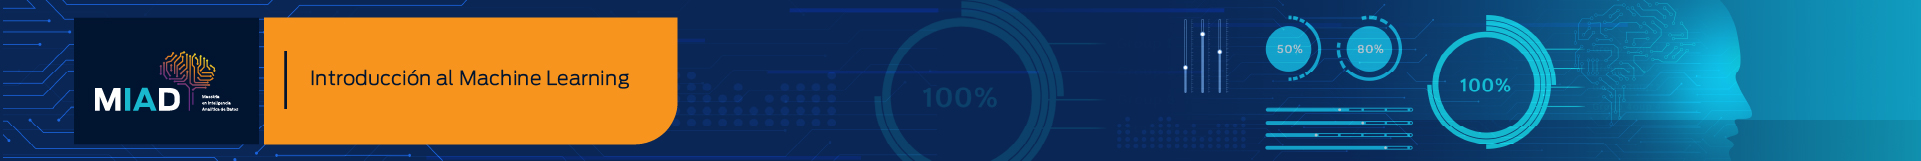

# Deep learning - Semana 2
## Redes neuronales: Metodos de regularizacion con Keras

### Propósito de la actividad


### Instrucciones generales

1. Para realizar la actividad solo siga las indicaciones asociadas a cada celda del notebook. Sin embargo, siéntase libre de modificar el archivo editando las celdas, lo que le permitirá afianzar su comprensión sobre las distintas funcionalidades de código.  

2. Recuerde que para esta actividad NO necesita realizar ningún tipo de entrega.

### Librerías a importar

A continuación se muestran los comandos a ejecutar para poder implementar los procedimientos de este notebook:


In [46]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.layers.core import Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

### Carga y separación de datos 

En primer lugar se carga un dataset con información de diabetes del National Institute of Diabetes and Digestive and
Kidney Diseases. Posteriormente, se determina cuáles son las variables de entrada y cuál es la variable de salida. 

A continuación un  descripción breve de las variables.

1. Número de veces en embarazo
2. Concentración de glucosa a 2 horas de test de toleranci
3. Presión sanguínea diastólica
4. Grosor de pliegue de triceps
5. Insulina 2 horas
6. Indice de masa corporal
7. Función de pedigree de diabetes 
8. Edad
9. Clase (0 o 1)
 

In [20]:
# Cargar los datos
dataset = pd.read_csv('test2.csv', sep=",").to_numpy()  
X_train, X_test, y_train, y_test = train_test_split(dataset[:,0:8], dataset[:,8], test_size=0.20)

Se define el modelo con 3 capas. Cada una con una función de activación y un número de neuronas, así:

In [25]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(8, activation='relu',  kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(1, activation='sigmoid',  kernel_regularizer=regularizers.l2(0.0001)))

### Regularizacion L1
Se define el modelo con 3 capas. Cada una de estas capas utiliza el regulador L1 con tasa 0.001

In [26]:
model1 = Sequential()
model1.add(Dense(12, input_dim=8, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model1.add(Dense(8, activation='relu',  kernel_regularizer=regularizers.l2(0.0001)))
model1.add(Dense(1, activation='sigmoid',  kernel_regularizer=regularizers.l2(0.0001)))

### Regularizacion L2
Se define el modelo con 3 capas. Cada una de estas capas utiliza el regulador L2 con tasa 0.001

In [27]:
model2 = Sequential()
model2.add(Dense(12, input_dim=8, activation='relu', kernel_regularizer=regularizers.l1(0.0001)))
model2.add(Dense(8, activation='relu',  kernel_regularizer=regularizers.l1(0.0001)))
model2.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l1(0.0001)))

### Dropout
Se define el modelo con 3 capas. Cada una de estas tiene una probabilidad de dropout de 0.25

In [28]:
modeldp = Sequential()
modeldp.add(Dense(12, input_dim=8, activation='relu'))
modeldp.add(Dropout(0.25))
modeldp.add(Dense(8, activation='relu'))
modeldp.add(Dropout(0.25))
modeldp.add(Dense(1, activation='sigmoid'))
modeldp.add(Dropout(0.25))

### Early stopping
Se define el modelo con 3 capas. 

In [35]:
modeles = Sequential()
modeles.add(Dense(12, input_dim=8, activation='relu'))
modeles.add(Dropout(0.25))
modeles.add(Dense(8, activation='relu'))
modeles.add(Dropout(0.25))
modeles.add(Dense(1, activation='sigmoid'))
modeles.add(Dropout(0.25))

### Compilación de los modelos 

Se debe seleccionar un función de pérdida, que en este caso es la función cross-entropy, el optimizador y el accuracy que se quiere evaluar. 

In [36]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modeldp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modeles.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Se entrenan los modelos con los datos de entrenamiento

In [59]:
history=model.fit(X_train, y_train, epochs=10, batch_size=10 )
history1=model1.fit(X_train, y_train, epochs=10, batch_size=10 )
history2=model2.fit(X_train, y_train, epochs=10, batch_size=10 )
historydp=modeldp.fit(X_train, y_train, epochs=10, batch_size=10 )
historyes=modeles.fit(X_train, y_train, epochs=10, batch_size=10 , callbacks = [EarlyStopping(monitor='val_acc', patience=2)])

Epoch 1/10
62/62 [==============================] - 0s 617us/step - loss: 0.4328 - accuracy: 0.8062
Epoch 2/10
62/62 [==============================] - 0s 574us/step - loss: 0.4313 - accuracy: 0.7948
Epoch 3/10
62/62 [==============================] - 0s 589us/step - loss: 0.4328 - accuracy: 0.7899
Epoch 4/10
62/62 [==============================] - 0s 591us/step - loss: 0.4289 - accuracy: 0.8013
Epoch 5/10
62/62 [==============================] - 0s 557us/step - loss: 0.4374 - accuracy: 0.7997
Epoch 6/10
62/62 [==============================] - 0s 573us/step - loss: 0.4301 - accuracy: 0.7964
Epoch 7/10
62/62 [==============================] - 0s 556us/step - loss: 0.4263 - accuracy: 0.8013
Epoch 8/10
62/62 [==============================] - 0s 557us/step - loss: 0.4339 - accuracy: 0.7997
Epoch 9/10
62/62 [==============================] - 0s 557us/step - loss: 0.4296 - accuracy: 0.8062
Epoch 10/10
62/62 [==============================] - 0s 573us/step - loss: 0.4265 - accuracy: 0.8046

Se calcula el accuracy de los modelos en con las bases de datos de train

In [60]:
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

_, accuracy = model1.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

_, accuracy = model2.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

_, accuracy = modeldp.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

_, accuracy = modeles.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

20/20 [==============================] - 0s 583us/step - loss: 0.4187 - accuracy: 0.8111
Accuracy: 81.11
20/20 [==============================] - 0s 575us/step - loss: 0.4644 - accuracy: 0.7866
Accuracy: 78.66
20/20 [==============================] - 0s 630us/step - loss: 0.4445 - accuracy: 0.8029
Accuracy: 80.29
20/20 [==============================] - 0s 630us/step - loss: 0.6210 - accuracy: 0.6629
Accuracy: 66.29
20/20 [==============================] - 0s 561us/step - loss: 0.6506 - accuracy: 0.6629
Accuracy: 66.29


Se hacen predicciones utilizando los modelos

In [61]:
predicciones = model.predict(X_test)
redondeado = [round(x[0]) for x in predicciones]
predicciones = (model.predict(X_test) > 0.5).astype(int)

predicciones1 = model1.predict(X_test)
redondeado1 = [round(x[0]) for x in predicciones1]
predicciones1 = (model1.predict(X_test) > 0.5).astype(int)

predicciones2 = model2.predict(X_test)
redondeado2 = [round(x[0]) for x in predicciones2]
predicciones2 = (model2.predict(X_test) > 0.5).astype(int)

prediccionesdp = modeldp.predict(X_test)
redondeadodp = [round(x[0]) for x in predicciones]
prediccionesdp = (modeldp.predict(X_test) > 0.5).astype(int)


prediccioneses = modeles.predict(X_test)
redondeadoes = [round(x[0]) for x in prediccioneses]
prediccioneses = (modeles.predict(X_test) > 0.5).astype(int)

Accuracy en el set de test

In [62]:
test_loss, test_acc = model.evaluate(X_test, y_test)
test_loss1, test_acc1 = model1.evaluate(X_test, y_test)
test_loss2, test_acc2 = model2.evaluate(X_test, y_test)
test_lossdp, test_accdp = modeldp.evaluate(X_test, y_test)
test_losses, test_acces = modeles.evaluate(X_test, y_test)

5/5 [==============================] - 0s 998us/step - loss: 0.7181 - accuracy: 0.6039


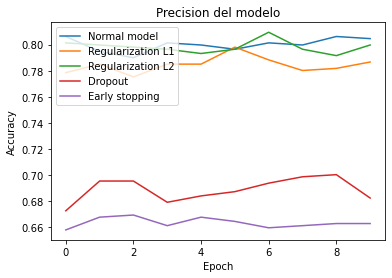

In [63]:
plt.figure(1)
# Graficar accuracy del modelo
plt.title('Precision del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(history.history['accuracy'])
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(historydp.history['accuracy'])
plt.plot(historyes.history['accuracy'])
plt.legend(['Normal model', 'Regularization L1', 'Regularization L2', 'Dropout', 'Early stopping' ], loc='upper left')
plt.show()

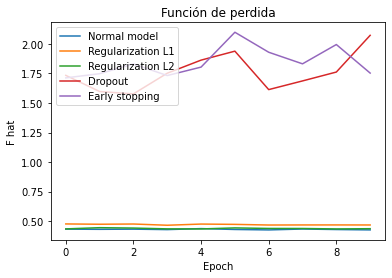

In [64]:
plt.figure(2)
# Graficar la función de pérdida evaluada
plt.title('Función de perdida')
plt.ylabel('F hat')
plt.xlabel('Epoch')
plt.plot(history.history['loss'])
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(historydp.history['loss'])
plt.plot(historyes.history['loss'])
plt.legend(['Normal model', 'Regularization L1', 'Regularization L2', 'Dropout', 'Early stopping' ], loc='upper left')
plt.show()

## Visualizacion

In [43]:
from keras.utils.vis_utils import plot_model

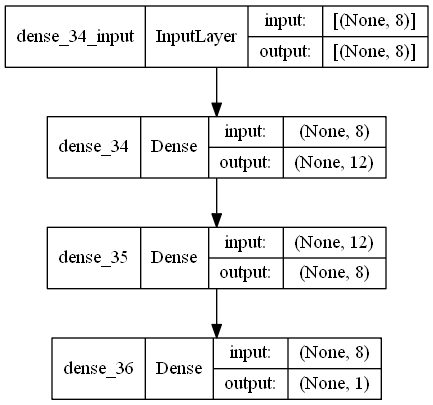

In [44]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [45]:
from ann_visualizer.visualize import ann_viz

ModuleNotFoundError: No module named 'ann_visualizer'

In [12]:
ann_viz(model_network, title="MNIST network", filename="MNIST.gv")

NameError: name 'ann_viz' is not defined